# Early Heart Disease Prediction Detection Using Machine Learning Algorithms


## Support Vector Machine (SVM)


In [3]:
import pandas as edhd_pd
import numpy as edhd_np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as edhd_plot
import seaborn as edhd_sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam


In [4]:
# loading edhd cleaned dataset

edhd_DataFrame= edhd_pd.read_csv('EDHD_Preprocessed.csv')
edhd_DataFrame

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,1,0,145,233,0,2,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,1,2,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,1,178,0,0.8,2,0,2,1
4,57,0,3,120,354,1,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,3,140,241,1,1,123,1,0.2,1,0,3,0
299,45,1,0,110,264,1,1,132,0,1.2,1,0,3,0
300,68,1,3,144,193,0,1,141,0,3.4,1,2,3,0
301,57,1,3,130,131,1,1,115,1,1.2,1,1,3,0


In [5]:
# Strip leading/trailing spaces from column names
edhd_DataFrame.columns = edhd_DataFrame.columns.str.strip()

ind_features = edhd_DataFrame.drop(columns = ['Heart Disease'],axis =1)
X = ind_features
dep_features = edhd_DataFrame['Heart Disease']
y = dep_features

In [6]:
Counter(y)

Counter({1: 165, 0: 138})

In [7]:
#performing Synthetic Minority Over-sampling Technique (SMOTE) to balance dataset.
sampler = SMOTE(random_state=5)
newSampledValue_x, newSampledValue_y = sampler.fit_resample(X, y)
X = newSampledValue_x
y = newSampledValue_y
Counter(newSampledValue_y)

Counter({1: 165, 0: 165})

In [8]:
edhd_X_trainValue, edhd_X_textValue, edhd_y_trainValue, edhd_y_textValue = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [9]:
#model building
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score
SVCmodel=  SVC(probability=True)
SVCmodel.fit(edhd_X_trainValue, edhd_y_trainValue)


predictedValue_y = SVCmodel.predict(edhd_X_textValue)
svc_accuracy = accuracy_score(edhd_y_textValue, predictedValue_y)

print(f"Acc for Train of SVC is {accuracy_score(edhd_y_trainValue, SVCmodel.predict(edhd_X_trainValue))}")
print(f"Acc for Test of SVC is {svc_accuracy} \n")
cm =confusion_matrix(edhd_y_textValue, SVCmodel.predict(edhd_X_textValue))
class_report = classification_report(edhd_y_textValue, predictedValue_y)

Acc for Train of SVC is 0.708502024291498
Acc for Test of SVC is 0.7349397590361446 



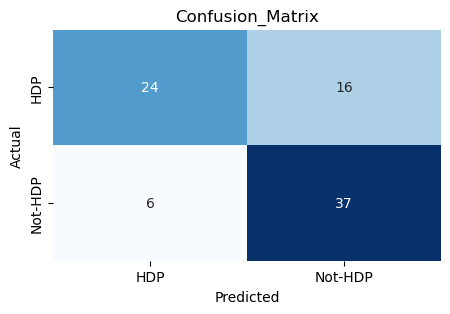

In [10]:
edhd_plot.figure(figsize=(5, 3))
edhd_sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['HDP', 'Not-HDP'], yticklabels=['HDP', 'Not-HDP'])
edhd_plot.title('Confusion_Matrix')
edhd_plot.xlabel('Predicted')
edhd_plot.ylabel('Actual')
edhd_plot.show()

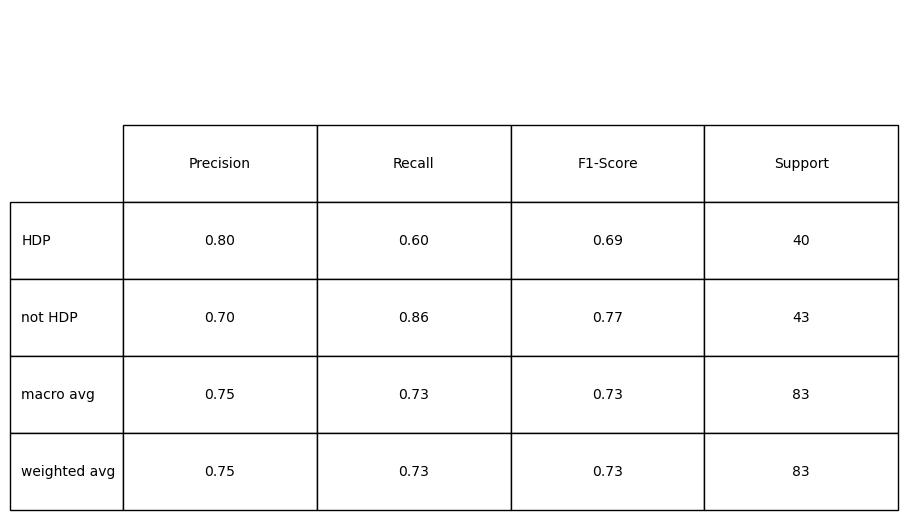

In [11]:
dataLines = class_report.split('\n')
classes = ['HDP','not HDP','macro avg','weighted avg']
table_data = []

for eachLine in dataLines[2:]:
    if eachLine.strip() and not eachLine.strip().startswith(('accuracy')):  # Check if the line is not empty
        t = eachLine.split()
        v = []
        for x in t[1:]:
            if (x != 'avg'):
                v.append(x)
        table_data.append(v)
table_data

fig, ax_svc = edhd_plot.subplots(figsize=(10, 5))
ax_svc.axis('off')

ax_svc.table(cellText=table_data, colLabels=['Precision', 'Recall', 'F1-Score', 'Support'],
         rowLabels=classes, cellLoc='center', loc='top',
         bbox=[0, -0.3, 1, 1])
edhd_plot.show()

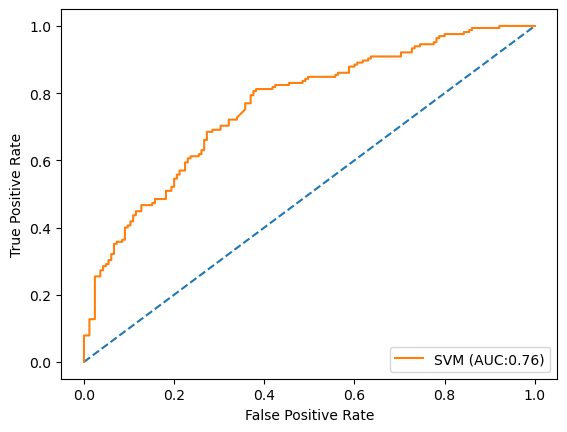

0.7624609733700642

In [12]:
# plotting the area under the Receiver Operating Characteristic (ROC) curve
prob_value = SVCmodel.predict_proba(X)[:,1]
auc_svc = roc_auc_score(y,prob_value)
fpr,tpr, threshold =  roc_curve(y,prob_value)
edhd_plot.plot([0,1],[0,1], linestyle = '--')
edhd_plot.plot(fpr,tpr,label = '%s (AUC:%0.2f)'  % ('SVM', auc_svc))
edhd_plot.xlabel('False Positive Rate')
edhd_plot.ylabel('True Positive Rate')
edhd_plot.legend( loc='lower right')
edhd_plot.show()
auc_svc